# Mid-term Exam

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github//afarbin/DATA1401-Spring-2020/blob/master/Exams/Mid-term/Exam.ipynb)

Add cells to this notebook as you need for your solutions and your test of your solutions.

1. Write a function `first_alphabetically(lst)` that takes a list `lst` of strings and returns the string that is alphabetically first. For example, calling your function with the list of states:

In [18]:
states=['Mississippi', 'Maryland', 'Delaware', 'Connecticut', 'Virginia', 'Utah', 'Kansas',
        'Wyoming', 'Indiana', 'Louisiana', 'Missouri', 'Illinois', 'Minnesota', 'Vermont', 
        'New Mexico', 'North Dakota', 'Wisconsin', 'Tennessee', 'New York', 'Oklahoma', 
        'Colorado', 'Pennsylvania', 'West Virginia', 'Alabama', 'Montana', 'Texas', 
        'Washington', 'Michigan', 'New Hampshire', 'Arkansas', 'Hawaii', 'Iowa', 
        'Idaho', 'Kentucky', 'Ohio', 'Nebraska', 'Alaska', 'Oregon', 'South Dakota', 
        'New Jersey', 'Florida', 'Georgia', 'Rhode Island', 'Arizona', 'Maine', 
        'South Carolina', 'California', 'Nevada', 'Massachusetts', 'North Carolina']

should return the string `"Alabama"`. Note that you can compare strings:

In [0]:
print("A">"B")
print("B">"A")
print("A">"a")
print("bca">"bbc")

Make sure your implementation isn't case sensitive. Do not use python's built-in `min`, `max`, `sort` or any other sort function you find.

In [19]:
def first_alphabetically(lst):
    first_str=lst[0]
    for string in lst:
        if string<first_str:
            first_str=string
    return first_str

In [20]:
first_alphabetically(states)

'Alabama'

2. Write a function `arg_first_alphabetically(lst)`, which does the same thing as in exercise 1 but returns the index of the first string alphabetically.

In [21]:
def arg_first_alphabetically(lst):
    first_str=lst[0]
    first_index=0
    for i, string in enumerate(lst):
        if string<first_str:
            first_str=string
            first_index=i
    return first_index,first_str

In [22]:
arg_first_alphabetically(states)

(23, 'Alabama')

3. Use your result in question 2 to implement a function `arg_sort_alphabetically(lst)` that returns a list that is alphabetically sorted. Sorting can be accomplished by successively applying the function in question 1 and removing the first element alphabetically. You can remove an element from a list using `pop()`. Make sure your implementation isn't case sensitive. Do not use python's built-in `min`, `max`, `sort` or any other sort function you find.

In [23]:
def arg_sort_alphabetically(lst):
    sort_list=list()
    
    while lst:
        smallest = first_alphabetically(lst)
        sort_list.append(smallest)
        lst.pop(lst.index(smallest))
    return sort_list



In [24]:
arg_sort_alphabetically(states)

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

4. Implement a function `outer_product` that takes two one-dimensional lists of numbers and returns the two-dimensional outer product matrix defined as:

\begin{equation*}
\begin{pmatrix} x_1\\x_2\\ \vdots \\x_m \end{pmatrix} \begin{pmatrix} y_1&y_2& \dots &y_n\end{pmatrix} =
\begin{pmatrix}
x_1y_1 & x_1y_2 & \dots & x_1y_n\\
x_2y_1 & x_2y_2 & \dots & x_2y_n\\
\vdots & \vdots & \ddots & \vdots \\
x_my_1 & x_my_2 & \dots & x_my_n
\end{pmatrix}
\end{equation*}

In other words the elements of matrix C which is the outer product of A and B are $c_{ij} = a_i b_j$.

In [43]:
def zero_matrix(m,n):
    out =list()
    for row in range(m):
        row=list()
        for j in range(n):
            row.append(0.)
        out.append(row)
    return out

def is_matrix(M):
    if isinstance(M,list):
        row_length=len(M[0])
        for row in M:
            if not row_length==len(row):
                return False
    else:
        False
    return True
        

def matrix_shape(M):
    if is_matrix(M):
        m=len(M)
        n=len(M[0])
        return m,n
    else:
        0,0

In [44]:
a=[[3.0],[2.0],[1.0]]
b=[[1.0, 2.0, 3.0]]
print(matrix_shape(a))
print(matrix_shape(b))

(3, 1)
(1, 3)


In [45]:
def outer_product(A,B):
    m_a,n_a=matrix_shape(A)
    m_b,n_b=matrix_shape(B)
    
    out_matrix=zero_matrix(m_a,n_b)

    if n_a==m_b:
        for i in range(m_a):
            for j in range(n_b):
                for k in range(n_a):
                    out_matrix[i][j]+=A[i][k]*B[k][j]
    
        return out_matrix
    
    return False

    

In [50]:
C=outer_product(a,b)
print("The shape of new matrix is:",matrix_shape(C))
for row in C:
    print(row)

The shape of new matrix is: (3, 3)
[3.0, 6.0, 9.0]
[2.0, 4.0, 6.0]
[1.0, 2.0, 3.0]


In [47]:
for row in C:
    print(row)

[3.0, 6.0, 9.0]
[2.0, 4.0, 6.0]
[1.0, 2.0, 3.0]


5. Implement a function `cumulative_sum(lst)` that takes a list of numbers and returns a list of same size where the element `i` is the sum of the elements `0` to `i` of the input list. For example given `[1,2,3]`, you should return [1,3,6].

In [41]:
def cumulative_sum(lst):
    cum_list=list()
    temp_sum=0
    for i in lst:
        cum_list.append(temp_sum+i)
        temp_sum+=i
    return cum_list

In [54]:
print(list(range(20)))
cumulative_sum(list(range(20)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


[0,
 1,
 3,
 6,
 10,
 15,
 21,
 28,
 36,
 45,
 55,
 66,
 78,
 91,
 105,
 120,
 136,
 153,
 171,
 190]

6. Imagine you have a normal distributed random variable `x`. For example `x` can be grades on this exam. Using the normal distribution generator and histogram functions from lecture (provided below) and `cumulative_sum` from previous question to compute what is the value of $x_{90}$ in $\sigma$ such that 90% of the values $x$ are below $x_{90}$. In other words:

$$
\int_{-\infty}^{x_{90}} N(x;\mu=0,\sigma=1) dx = 0.9
$$

In [105]:
import math,random

def arange(x_min,x_max,steps=10):
    step_size=(x_max-x_min)/steps
    x=x_min
    out = list()
    for i in range(steps):
        out.append(x)
        x+=step_size
    return out

def generate_normal(N,m=0,s=1):
    out = list() 
    
    while len(out)<N:
#    for _ in range(int(float(N)/2)+1):
        U1=random.random()
        U2=random.random()
    
        out.append(s*math.sqrt(-2*math.log(U1))*math.cos(2*math.pi*U2)+m)
        out.append(s*math.sqrt(-2*math.log(U1))*math.sin(2*math.pi*U2)+m)

    return out[:N]

def histogram(data, n_bins=10,x_min=None, x_max=None):
    if x_min==None:
        x_min=min(data)
    if x_max==None:
        x_max=max(data)
        
    bin_edges = arange(x_min,x_max,n_bins)
    bin_edges.append(x_max)

    hist=[0]*n_bins
    
    for d in data:
        for i in range(n_bins):
            if d>=bin_edges[i] and d<bin_edges[i+1]:
                hist[i]+=1
                break
                
    return hist,bin_edges



In [205]:
#Solution Code
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def compute_sigma(func,x90,mu, std, n_bins):
    P=list()
    x = func
    fig, ax = plt.subplots(figsize=(8, 4))
    # plot the cumulative histogram
    n, bins, patches = ax.hist(x, n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical')
    
    x=arg_sort_alphabetically(func)
    cum_sum=cumulative_sum(x)
    for i,val in enumerate(cum_sum):
        P.append((i/(len(cum_sum)+1)))
        
    xp=x90*len(cum_sum)
    for m, v in enumerate(P):
        if m==xp:
            Z=v
    sigma = (x90-mu)/Z
    
    # Add a line showing the expected distribution.
    y = ((1 / (np.sqrt(2 * np.pi) * std)) *
     np.exp(-0.5 * (1 / std * (bins - mu))**2))
    y = y.cumsum()
    y /= y[-1]

    ax.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical')

    # tidy up the figure
    ax.grid(True)
    ax.legend(loc='right')
    ax.set_title('Cumulative step histograms')
    ax.set_xlabel('Z value')
    ax.set_ylabel('Likelihood of occurrence')
    plt.show()
   
    return sigma


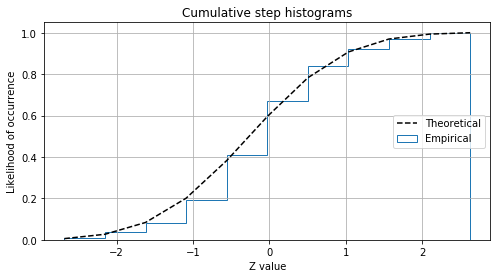

1.01

In [206]:
compute_sigma(generate_normal(100),x90=0.9,mu=0,std=1,n_bins=10)

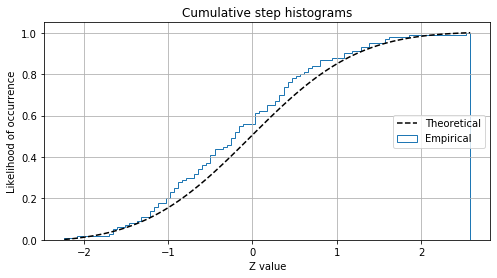

1.01

In [207]:
compute_sigma(generate_normal(100),x90=0.9,mu=0,std=1,n_bins=100)